In [840]:
from __future__ import annotations
from math import sqrt, pi, atan2, cos, sin
import numpy as np

class Complex:
    x: float = 0  # real
    y: float = 0  # imaginary

    def __init__(self):
        self.x = 0
        self.y = 0

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other: Complex) -> Complex:
        ret = Complex(0, 0)
        ret.x = self.x + other.x
        ret.y = self.y + other.y
        return ret

    def __sub__(self, other: Complex) -> Complex:
        ret = Complex(0, 0)
        ret.x = self.x - other.x
        ret.y = self.y - other.y
        return ret

    def __mul__(self, other: Complex) -> Complex:
        ret = Complex(0, 0)
        ret.x = self.x * other.x - self.y * other.y
        ret.y = self.x * other.y + self.y * other.x
        return ret

    def __truediv__(self, other: Complex) -> Complex:
        ret = Complex(0, 0)
        ret.x = (self.x * other.x + self.y * other.y) / (
            other.x * other.x + other.y * other.y
        )
        ret.y = (self.y * other.x - self.x * other.y) / (
            other.x * other.x + other.y * other.y
        )
        return ret

    def __str__(self):
        if self.y == 0:
            return round(self.x, 2).__str__() + "\t"
        elif self.x == 0:
            return round(self.y, 2).__str__() + "i\t"
        else:
            return (
                round(self.x, 2).__str__() + " + " + round(self.y, 2).__str__() + "i"
            )

    def __eq__(self, other: Complex) -> bool:
        return self.x == other.x and self.y == other.y

    def modulus(self) -> float:
        return sqrt(self.x * self.x + self.y * self.y)

    def conjugate(self) -> Complex:
        return Complex(self.x, -self.y)

    def negate(self) -> Complex:
        return Complex(-self.x, -self.y)

    def toPolar(self) -> Polar:
        r = self.modulus()
        theta = atan2(self.y, self.x)
        return Polar(r, theta)

    def pow(self, n: int) -> Complex:
        polar = self.toPolar()
        polar.r = polar.r**n
        polar.theta = polar.theta * n
        return polar.toCartesian()

    def root(self, n: int) -> [Complex]:
        ret = []
        polar = self.toPolar()
        polar.r = polar.r ** (1 / n)
        for i in range(n):
            polar.theta = (polar.theta + 2 * pi * i) / n
            ret.append(polar.toCartesian())
        return ret

In [841]:
class Polar:
    r: float = 0
    theta: float = 0

    def __init__(self):
        self.r = 0
        self.theta = 0

    def __init__(self, r, theta):
        self.r = r
        self.theta = theta

    def __str__(self):
        return self.r.__str__() + "e^(" + self.theta.__str__() + "i)"

    def __eq__(self, other: Polar) -> bool:
        return self.r == other.r and self.theta == other.theta

    def toCartesian(self) -> Complex:
        x = self.r * cos(self.theta)
        y = self.r * sin(self.theta)
        return Complex(x, y)

In [842]:
a = Complex(1, 2)
b = Complex(3, 4)
c = a + b
print(c)
c = a - b
print(c)
c = a * b
print(c)
c = a / b
print(c)

print(a)
print(a.modulus())

print(a.conjugate())

print(a.toPolar())
print(Polar(2, pi / 2))
a = Complex(1, -1)
print(a.pow(5))
a = Complex(3, -4)
print(a.toPolar())

4 + 6i
-2 + -2i
-5 + 10i
0.44 + 0.08i
1 + 2i
2.23606797749979
1 + -2i
2.23606797749979e^(1.1071487177940904i)
2e^(1.5707963267948966i)
-4.0 + 4.0i
5.0e^(-0.9272952180016122i)


In [843]:
class ComplexVector(list):
    def __init__(self, input):
        if isinstance(input, int):
            self.v = [Complex(0, 0) for _ in range(input)]
            self.n = input
        elif isinstance(input, list):
            self.v = input
            self.n = len(input)

    def __setitem__(self, index, item):
        self.v.__setitem__(index, item)

    def __getitem__(self, index):
        return self.v.__getitem__(index)

    def insert(self, index, item):
        self.v.insert(index, item)

    def append(self, item):
        self.v.append(item)

    def extend(self, other):
        self.v.extend(other)

    def __add__(self, other: ComplexVector) -> ComplexVector:
        ret = ComplexVector(self.n)
        for i in range(len(self.v)):
            ret[i] = self[i] + other[i]
        return ret

    def __sub__(self, other: ComplexVector) -> ComplexVector:
        ret = ComplexVector(self.n)
        for i in range(len(self.v)):
            ret[i] = self[i] - other[i]
        return ret

    def inverse(self) -> ComplexVector:
        ret = ComplexVector(self.n)
        for i in range(len(self.v)):
            ret[i] = self[i].negate()
        return ret

    def __mul__(self, c: Complex) -> ComplexVector:
        ret = ComplexVector(self.n)
        for i in range(len(self.v)):
            ret[i] = self[i] * c
        return ret

    def __eq__(self, other: ComplexVector) -> bool:
        for i in range(len(self.v)):
            if self[i] != other[i]:
                return False
        return True

    def mulByNorm(self, other: float) -> ComplexVector:
        complex = Complex(other, 0)
        return self * complex

    def __str__(self) -> str:
        finalString = ""
        for i in range(len(self.v)):
            finalString += "|" + self[i].__str__() + "|\n"
        return finalString

    def scalarProduct(self, other: ComplexVector) -> Complex:
        if self.n != other.n:
            raise Exception("Vectors must be of same length")
        ret = Complex(0, 0)
        for i in range(len(self.v)):
            ret += self[i] * other[i].conjugate()
        return ret

    def norm(self) -> float:
        return sqrt(self.scalarProduct(self).x)

    def distance(self, other: ComplexVector) -> float:
        return (self - other).norm()

    def tensorProduct(self, other: ComplexVector) -> ComplexVector:
        ret = ComplexVector(self.n * other.n)
        for i in range(len(self.v)):
            for j in range(len(other.v)):
                ret[i * len(other.v) + j] = self[i] * other[j]
        return ret

In [844]:
test = ComplexVector([
    Complex(1, 2),
    Complex(3, 4),
    Complex(5, 6),
    Complex(7, 8),
    Complex(0, 0)])
print(test + test)
print(test.inverse())
print(test * Complex(2, 0))
print(test.scalarProduct(test))
print(test.norm())

|2 + 4i|
|6 + 8i|
|10 + 12i|
|14 + 16i|
|0	|

|-1 + -2i|
|-3 + -4i|
|-5 + -6i|
|-7 + -8i|
|0	|

|2 + 4i|
|6 + 8i|
|10 + 12i|
|14 + 16i|
|0	|

204	
14.2828568570857


In [845]:
class ComplexMatrix(list):
    def __init__(self, n, m: int = 0):
        if isinstance(n, int) and isinstance(m, int):
            self.matrix = [ComplexVector(m) for _ in range(n)]
            self.n = n
            self.m = m
        elif isinstance(n, list) and isinstance(n[0], list):
            self.matrix = [ComplexVector(n[i]) for i in range(len(n))]  
            for i in range(len(n)):
                self.matrix[i] = ComplexVector(n[i])
            self.n = len(n)
            self.m = len(n[0])

    def __setitem__(self, index, item: ComplexVector):
        self.matrix.__setitem__(index, item)

    def __getitem__(self, index):
        return self.matrix.__getitem__(index)

    def insert(self, index, item:ComplexVector):
        self.matrix.insert(index, item)

    def append(self, item: ComplexVector):
        self.matrix.append(item)

    def extend(self, other: [ComplexVector]):
        self.matrix.extend(other)  

    def __add__(self, other: ComplexMatrix) -> ComplexMatrix:
        ret = ComplexMatrix(self.n, self.m)
        for i in range(self.n):
            ret[i] = self[i] + other[i]
        return ret

    def __sub__(self, other: ComplexMatrix) -> ComplexMatrix:
        ret = ComplexMatrix(self.n, self.m)
        for i in range(self.n):
            ret[i] = self[i] - other[i]
        return ret

    def inverse(self) -> ComplexMatrix:
        ret = ComplexMatrix(self.n, self.m)
        for i in range(self.n):
            ret[i] = self[i].negate()
        return ret

    def Scalar(self, c: Complex) -> ComplexMatrix:
        ret = ComplexMatrix(self.n, self.m)
        for i in range(self.n):
            ret[i] = self[i] * c
        return ret

    def __str__(self) -> str:
        # print(np.matrix([self.matrix[i] for i in range(self.n)]).view())
        ret = ""
        for i in range(self.n):
            ret += "|"
            for j in range(self.m):
                ret += self[i][j].__str__()+ ", "
            ret = ret[:-2]
            ret += "|"
            ret += "\n"
        return ret

    def __mul__(self, other: ComplexMatrix) -> ComplexMatrix:
        if self.m != other.n:
            raise Exception("Invalid matrix multiplication")
        ret = ComplexMatrix(self.n, other.m)
        for i in range(self.n):
            for j in range(other.m):
                for k in range(self.m):
                    ret[i][j] += self[i][k] * other[k][j]
        return ret

    def transpose(self) -> ComplexMatrix:
        ret = ComplexMatrix(self.m, self.n)
        for i in range(self.n):
            for j in range(self.m):
                ret[j][i] = self[i][j]
        return ret

    def conjugate(self) -> ComplexMatrix:
        ret = ComplexMatrix(self.n, self.m)
        for i in range(self.n):
            for j in range(self.m):
                ret[i][j] = self[i][j].conjugate()
        return ret

    def dagger(self) -> ComplexMatrix:
        return self.transpose().conjugate()

    def multiplyByVector(self, vector: ComplexVector) -> ComplexVector:
        if self.m != vector.n:
            raise Exception("Invalid matrix multiplication")
        ret = ComplexVector(self.n)
        for i in range(self.n):
            for j in range(self.m):
                ret[i] += self[i][j] * vector[j]
        return ret
    
    def multiplyByScalar(self, scalar: Complex) -> ComplexMatrix:
        ret = ComplexMatrix(self.n, self.m)
        for i in range(self.n):
            for j in range(self.m):
                ret[i][j] = self[i][j] * scalar
        return ret

    @staticmethod
    def identity(n: int) -> ComplexMatrix:
        ret = ComplexMatrix(n, n)
        for i in range(n):
            ret[i][i] = Complex(1, 0)
        return ret

    @staticmethod
    def hadamardMatrix(M: int):
        n = 2**M
        # Initializing a matrix of order n
        hadamard = [[0] * n for _ in range(n)]

        # Initializing the 0th column and
        # 0th row element as 1
        hadamard[0][0] = 1

        k = 1
        while k < n:
            # Loop to copy elements to
            # other quarters of the matrix
            for i in range(k):
                for j in range(k):
                    hadamard[i + k][j] = hadamard[i][j]
                    hadamard[i][j + k] = hadamard[i][j]
                    hadamard[i + k][j + k] = -hadamard[i][j]
            k *= 2

        # Displaying the final hadamard matrix
        for i in range(n):
            for j in range(n):
                print(hadamard[i][j], end=" ")
            print()

    @staticmethod
    def identityMatrix(n:int) -> ComplexMatrix:
        matrix = ComplexMatrix(n, n)
        for i in range(n):
            matrix[i][i] = Complex(1, 0)
        return matrix

    def __eq__(self, other: ComplexMatrix) -> bool:
        for i in range(self.n):
            if self[i] != other[i]:
                return False
        return True

    def isHermitian(self) -> bool:
        return self == self.dagger()

    def isUnitary(self) -> bool:
        leftSide = self * self.dagger()
        rightSide = self.dagger() * self
        return leftSide == rightSide == ComplexMatrix.identity(self.n)

    def tensorProduct(self, other: ComplexMatrix) -> ComplexMatrix:
        ret = ComplexMatrix(self.n * other.n, self.m * other.m)
        for i in range(self.n):
            for j in range(self.m):
                for k in range(other.n):
                    for l in range(other.m):
                        ret[i * other.n + k][j * other.m + l] = (
                            self[i][j] * other[k][l]
                        )
        return ret
    
    def getEigenValuesAndEigenVectors(self:ComplexMatrix) -> ([Complex], [ComplexVector]):
        matrix = np.zeros((self.n, self.n),dtype=complex)
        for i in range(self.n):
            for j in range(self.n):
                matrix[i][j] = self[i][j].x + self[i][j].y * 1j
        eigenValues, eigenVectors = np.linalg.eig(matrix)

        eigenValues = [Complex(eigenValues[i].real, eigenValues[i].imag) for i in range(len(eigenValues))]
        eigenVectors = [ComplexVector([Complex(eigenVectors[i][j].real, eigenVectors[i][j].imag) for j in range(len(eigenVectors[i]))]) for i in range(len(eigenVectors))]
        return eigenValues, eigenVectors 

In [846]:
testMatrix = ComplexMatrix( [
    [ Complex(1, 2), Complex(3, 4) ],
    [ Complex(5, 6), Complex(7, 8) ]])
print(testMatrix)
print(testMatrix +testMatrix)
# create 2 test matrices for multiplication
testMatrix1 = ComplexMatrix([
    [Complex(3,2), Complex(0,0), Complex(5,-6)],
    [Complex(1,0), Complex(4,2), Complex(0,1)],
    [Complex(4,-1), Complex(0,0), Complex(4,0)]])
print (testMatrix1)
testMatrix2 = ComplexMatrix([
    [Complex(5,0), Complex(2,-1), Complex(6,-4)],
    [Complex(0,0), Complex(4,5), Complex(2,0)],
    [Complex(7,-4), Complex(2,7), Complex(0,0)]])

print(testMatrix1 * testMatrix2)
print (testMatrix1.Scalar(Complex(2, 0)))
print(testMatrix1.transpose())
print(testMatrix1.conjugate())
print(testMatrix1.dagger())

testVector = ComplexVector([
    Complex(1, 2),
    Complex(3, 4),
    Complex(5, 6)])
print(testMatrix1.multiplyByVector(testVector))
print (ComplexMatrix.hadamardMatrix(1))
print (ComplexMatrix.hadamardMatrix(3))

hermitianMatrix = ComplexMatrix([
    [ Complex(7, 0), Complex(6, 5)],
    [ Complex(6, -5), Complex(-3, 0)]])
print(hermitianMatrix.isHermitian())
print(hermitianMatrix.isUnitary())
theta = pi/4
unitaryMatrix = ComplexMatrix([
    [Complex(cos(theta), 0), Complex(0, -sin(theta)), Complex(0, 0)],
    [Complex(0, -sin(theta)), Complex(cos(theta), 0), Complex(0, 0)],
    [Complex(0, 0), Complex(0, 0), Complex(1, 0)]])

print(unitaryMatrix.isHermitian())
print(unitaryMatrix.isUnitary())

# tensor product
tensorProductMatrix = ComplexMatrix([
    [Complex(1,0), Complex(2,0)],
    [Complex(3,0), Complex(4,0)]])
print(tensorProductMatrix.tensorProduct(tensorProductMatrix))

|1 + 2i, 3 + 4i|
|5 + 6i, 7 + 8i|

|2 + 4i, 6 + 8i|
|10 + 12i, 14 + 16i|

|3 + 2i, 0	, 5 + -6i|
|1	, 4 + 2i, 1i	|
|4 + -1i, 0	, 4	|

|26 + -52i, 60 + 24i, 26	|
|9 + 7i, 1 + 29i, 14	|
|48 + -21i, 15 + 22i, 20 + -22i|

|6 + 4i, 0	, 10 + -12i|
|2	, 8 + 4i, 2i	|
|8 + -2i, 0	, 8	|

|3 + 2i, 1	, 4 + -1i|
|0	, 4 + 2i, 0	|
|5 + -6i, 1i	, 4	|

|3 + -2i, 0	, 5 + 6i|
|1	, 4 + -2i, -1i	|
|4 + 1i, 0	, 4	|

|3 + -2i, 1	, 4 + 1i|
|0	, 4 + -2i, 0	|
|5 + 6i, -1i	, 4	|

|60 + 8i|
|-1 + 29i|
|26 + 31i|

1 1 
1 -1 
None
1 1 1 1 1 1 1 1 
1 -1 1 -1 1 -1 1 -1 
1 1 -1 -1 1 1 -1 -1 
1 -1 -1 1 1 -1 -1 1 
1 1 1 1 -1 -1 -1 -1 
1 -1 1 -1 -1 1 -1 1 
1 1 -1 -1 -1 -1 1 1 
1 -1 -1 1 -1 1 1 -1 
None
True
True
True
True
|1	, 2	, 2	, 4	|
|3	, 4	, 6	, 8	|
|3	, 6	, 4	, 8	|
|9	, 12	, 12	, 16	|



In [847]:
def matrixToThePower(matrix: [[bool]], power:int) -> [[bool]]:
    newMatrix = matrix
    for _ in range(power-1):
        newMatrix =boolMatrixMultiplication(newMatrix, matrix)
    return newMatrix

def boolMatrixMultiplication(matrix1: [[bool]], matrix2: [[bool]]) -> [[bool]]:
    if len(matrix1[0]) != len(matrix2):
        raise Exception("Invalid matrix multiplication")
    ret = [[False for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                ret[i][j] = ret[i][j] or (matrix1[i][k] and matrix2[k][j])
    return ret

def marbleExperiment(matrix: [[bool]], marblesInTheStates: [int], iterations: int)-> [int]:
    if len(matrix) != len(marblesInTheStates):
        raise Exception("Invalid input")
    newMatrix = matrixToThePower(matrix, iterations)
    newMarbles = [0 for _ in range(len(marblesInTheStates))]
    for i in range(len(marblesInTheStates)):
        for j in range(len(marblesInTheStates)):
            if newMatrix[j][i]:
                newMarbles[j] += marblesInTheStates[i]
    return newMarbles

In [848]:
connections = [ [False, False, False, False, False, False],
                [False, False, False, False, False, False],
                [False, True,  False, False, False, True ],
                [False, False, False, True,  False, False],
                [False, False, True,  False, False, False],
                [True, False, False, False, True,  False]]
marbles = [6,2,1,5,3,10]
newMarbles = marbleExperiment(connections, marbles,1)
print(newMarbles)

[0, 0, 12, 5, 1, 9]


In [849]:
def matrixToThePowerFloat(matrix: [[float]], power:int) -> [[float]]:
    newMatrix = matrix
    for _ in range(power-1):
        newMatrix =floatMatrixMultiplication(newMatrix, matrix)
    return newMatrix

def floatMatrixMultiplication(matrix1: [[float]], matrix2: [[float]]) -> [[float]]:
    if len(matrix1[0]) != len(matrix2):
        raise Exception("Invalid matrix multiplication")
    ret = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                ret[i][j] += matrix1[i][k] * matrix2[k][j]
    return ret

def fancyPrint(matrix: [[float]]):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            print(format(matrix[i][j],".2f"), end="\t")
        print()

def marbleExperimentFloat(matrix: [[float]], marblesInTheStates: [int], iterations: int)-> [float]:
    if len(matrix) != len(marblesInTheStates):
        raise Exception("Invalid input")
    newMatrix = matrixToThePowerFloat(matrix, iterations)
    newMarbles = [float(0) for _ in range(len(marblesInTheStates))]
    for i in range(len(marblesInTheStates)):
        for j in range(len(marblesInTheStates)):
            newMarbles[j] += newMatrix[j][i] * marblesInTheStates[i]
    return newMarbles

In [850]:
billiardBall = [[0, 0.5, 0.5, 0],
                [0.5, 0, 0, 0.5],
                [0.5, 0, 0, 0.5],
                [0, 0.5, 0.5, 0]]
marbles = [1,0,0,0]
print(marbleExperimentFloat(billiardBall, marbles, 3))

[0.0, 0.5, 0.5, 0.0]


In [851]:
def slitExperiment(numberOfSlits:int, numberOfTargets:int, slitProbabilities:[float], targetProbabilities:[[float]]):
    constructFloatMatrix: [[float]] =  [[0 for _ in range(numberOfSlits + numberOfTargets+1)] for _ in range(numberOfSlits + numberOfTargets+1)]
    for i in range(numberOfSlits):
        constructFloatMatrix[i+1][0] = slitProbabilities[i]
    for i in range(numberOfSlits):
        for j in range(numberOfTargets):
            constructFloatMatrix[numberOfSlits+j+1][i+1] = targetProbabilities[i][j]
    for i in range(numberOfTargets):
        constructFloatMatrix[numberOfSlits+i+1][numberOfSlits+1+i] = 1
    fancyPrint(constructFloatMatrix)

    initialMarbles = [0 for _ in range(numberOfSlits + numberOfTargets+1)]
    initialMarbles[0] = 1
    print(initialMarbles)
    print(marbleExperimentFloat(constructFloatMatrix, initialMarbles, 2))



In [852]:
# slitExperiment(2, 4, [0.5, 0.5], [[0.5, 0.5,0,0], [0,0,0.5, 0.5]])
slitExperiment(2, 5, [0.5,0.5],[[1/3, 1/3, 1/3,0,0], [0,0,1/3,1/3, 1/3]])
slitExperiment(3, 5, [1/3,1/3,1/3],[[1/3, 1/3, 1/3,0,0], [0,1/3,1/3, 1/3,0], [0,0,1/3, 1/3, 1/3]])

0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.50	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.50	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.00	0.33	0.00	1.00	0.00	0.00	0.00	0.00	
0.00	0.33	0.00	0.00	1.00	0.00	0.00	0.00	
0.00	0.33	0.33	0.00	0.00	1.00	0.00	0.00	
0.00	0.00	0.33	0.00	0.00	0.00	1.00	0.00	
0.00	0.00	0.33	0.00	0.00	0.00	0.00	1.00	
[1, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666]
0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.33	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.33	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.33	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	
0.00	0.33	0.00	0.00	1.00	0.00	0.00	0.00	0.00	
0.00	0.33	0.33	0.00	0.00	1.00	0.00	0.00	0.00	
0.00	0.33	0.33	0.33	0.00	0.00	1.00	0.00	0.00	
0.00	0.00	0.33	0.33	0.00	0.00	0.00	1.00	0.00	
0.00	0.00	0.00	0.33	0.00	0.00	0.00	0.00	1.00	
[1, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.22

In [853]:
import copy
def matrixToThePowerComplex(matrix: ComplexMatrix, power:int) -> ComplexMatrix:
    newMatrix = copy.deepcopy(matrix)
    for _ in range(power-1):
        newMatrix = newMatrix * matrix
    return newMatrix

def marbleExperimentComplex(matrix: ComplexMatrix, marblesInTheStates: ComplexVector, iterations: int)-> ComplexVector:
    if matrix.n != marblesInTheStates.n:
        raise Exception("Invalid input")
    newMatrix = matrixToThePowerComplex(matrix, iterations)
    return newMatrix.multiplyByVector(marblesInTheStates)

In [854]:
quantumBilliard  = ComplexMatrix([
    [Complex(0,0), Complex(1/sqrt(2),0), Complex(1/sqrt(2),0), Complex(0,0)],
    [Complex(1/sqrt(2),0), Complex(0,0), Complex(0,0), Complex(-1/sqrt(2),0)],
    [Complex(1/sqrt(2),0), Complex(0,0), Complex(0,0), Complex(1/sqrt(2),0)],
    [Complex(0,0), Complex(-1/sqrt(2),0), Complex(1/sqrt(2),0), Complex(0,0)]])
print(quantumBilliard)

initialMarbles = ComplexVector(4)
initialMarbles[0] = Complex(1, 0)

print(marbleExperimentComplex(quantumBilliard, initialMarbles, 1))
print()
print(marbleExperimentComplex(quantumBilliard, initialMarbles, 2))
print()
print(marbleExperimentComplex(quantumBilliard, initialMarbles, 3))
print()
print(marbleExperimentComplex(quantumBilliard, initialMarbles, 4))

|0	, 0.71	, 0.71	, 0	|
|0.71	, 0	, 0	, -0.71	|
|0.71	, 0	, 0	, 0.71	|
|0	, -0.71	, 0.71	, 0	|

|0.0	|
|0.71	|
|0.71	|
|0.0	|


|1.0	|
|0.0	|
|0.0	|
|0.0	|


|0.0	|
|0.71	|
|0.71	|
|0.0	|


|1.0	|
|0.0	|
|0.0	|
|0.0	|



In [855]:
def slitExperimentComplex(numberOfSlits:int, numberOfTargets:int, slitProbabilities:ComplexVector, targetProbabilities:[ComplexVector]):
    complexMatrix = ComplexMatrix(numberOfSlits + numberOfTargets+1, numberOfSlits + numberOfTargets+1)

    for i in range(numberOfSlits):
        complexMatrix[i+1][0] = slitProbabilities[i]
    for i in range(numberOfSlits):
        for j in range(numberOfTargets):
            complexMatrix[numberOfSlits+j+1][i+1] = targetProbabilities[i][j]
    for i in range(numberOfTargets):
        complexMatrix[numberOfSlits+i+1][numberOfSlits+1+i] = Complex(1,0)
    print(complexMatrix)

    initialMarbles = ComplexVector(numberOfSlits + numberOfTargets+1)
    initialMarbles[0] = Complex(1, 0)
    print(initialMarbles)

    print(marbleExperimentComplex(complexMatrix, initialMarbles, 2))



In [856]:
slitProbabilities = ComplexVector([
    Complex(1/sqrt(2), 0),
    Complex(1/sqrt(2), 0)])

targetProbabilities = [ComplexVector(5) for _ in range(2)]
targetProbabilities[0][0] = Complex(-1/sqrt(6),1/sqrt(6))
targetProbabilities[0][1] = Complex(-1/sqrt(6),-1/sqrt(6))
targetProbabilities[0][2] = Complex(1/sqrt(6),-1/sqrt(6))
targetProbabilities[1][2] = Complex(-1/sqrt(6),1/sqrt(6))
targetProbabilities[1][3] = Complex(-1/sqrt(6),-1/sqrt(6))
targetProbabilities[1][4] = Complex(1/sqrt(6),-1/sqrt(6))

print(slitExperimentComplex(2, 5, slitProbabilities, targetProbabilities))

|0	, 0	, 0	, 0	, 0	, 0	, 0	, 0	|
|0.71	, 0	, 0	, 0	, 0	, 0	, 0	, 0	|
|0.71	, 0	, 0	, 0	, 0	, 0	, 0	, 0	|
|0	, -0.41 + 0.41i, 0	, 1	, 0	, 0	, 0	, 0	|
|0	, -0.41 + -0.41i, 0	, 0	, 1	, 0	, 0	, 0	|
|0	, 0.41 + -0.41i, -0.41 + 0.41i, 0	, 0	, 1	, 0	, 0	|
|0	, 0	, -0.41 + -0.41i, 0	, 0	, 0	, 1	, 0	|
|0	, 0	, 0.41 + -0.41i, 0	, 0	, 0	, 0	, 1	|

|1	|
|0	|
|0	|
|0	|
|0	|
|0	|
|0	|
|0	|

|0.0	|
|0.0	|
|0.0	|
|-0.29 + 0.29i|
|-0.29 + -0.29i|
|0.0	|
|-0.29 + -0.29i|
|0.29 + -0.29i|

None


In [857]:
def quantumSystem(numberOfPoint: int, initialStates:ComplexVector,endStates:ComplexVector = ComplexVector(0)): # initialStates -> amplitudes
    normOfStates = initialStates.norm()
    print(initialStates)
    for i in range(numberOfPoint):
        print ("Probability of being at point " + i.__str__() + " is " + (initialStates[i].modulus() ** 2 / normOfStates ** 2).__str__())

    #normalized
    normalizedStates = initialStates.mulByNorm(1/normOfStates)
    print(normalizedStates)
    print(normalizedStates.norm())

    for i in range(numberOfPoint):
        print ("Probability of being at point " + i.__str__() + " is " + (normalizedStates[i].modulus() ** 2).__str__())

    if endStates.n != 0:
        normalizedEndStates = endStates.mulByNorm(1/endStates.norm())
        resultAmplitude = normalizedEndStates.scalarProduct(normalizedStates) # basically we get the coeficcient of the endState which was a linear combination of the initial states by the coefficients
        print("Probability of being at end state is " + (resultAmplitude.modulus() ** 2).__str__())


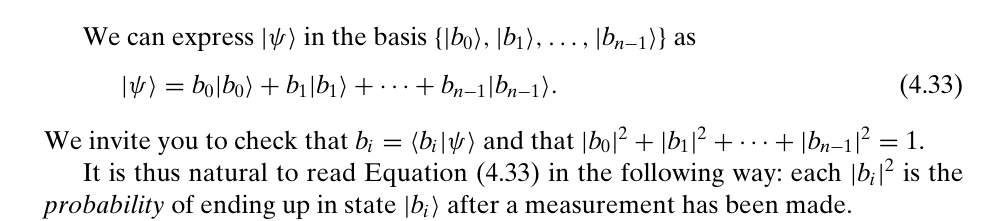

In [858]:
secondBasisStates = ComplexVector(
    [Complex(1/sqrt(2),0),
     Complex(0,1/sqrt(2))])
oneBasisStates = ComplexVector(
    [Complex(1/sqrt(2),0),
     Complex(0,-1/sqrt(2))])
inputStates = oneBasisStates * Complex(1/sqrt(3),0) + (secondBasisStates*Complex(1/sqrt(7),0))
quantumSystem(2, inputStates,secondBasisStates)
quantumSystem(2, inputStates,oneBasisStates)


|0.68	|
|-0.14i	|

Probability of being at point 0 is 0.9582575694955839
Probability of being at point 1 is 0.04174243050441603
|0.98	|
|-0.2i	|

0.9999999999999999
Probability of being at point 0 is 0.9582575694955838
Probability of being at point 1 is 0.04174243050441602
Probability of being at end state is 0.29999999999999993
|0.68	|
|-0.14i	|

Probability of being at point 0 is 0.9582575694955839
Probability of being at point 1 is 0.04174243050441603
|0.98	|
|-0.2i	|

0.9999999999999999
Probability of being at point 0 is 0.9582575694955838
Probability of being at point 1 is 0.04174243050441602
Probability of being at end state is 0.7000000000000001


In [859]:
def observables(operator : ComplexMatrix, ket: ComplexVector):
    # check if hermitian
    if not operator.isHermitian():
        raise Exception("Operator is not hermitian")
    # calculate mean value
    mean = meanOfOperatorAndKet(operator, ket)
    print("Mean value is " + mean.__str__())
    variance = varianceOfOperatorAndKet(operator, ket)
    print("Variance is " + variance.__str__())

    # calculate variance
def meanOfOperatorAndKet(operator: ComplexMatrix, ket: ComplexVector) -> Complex: # mean - <\omega>_\psi
    return operatorOfKet(operator, ket).scalarProduct(ket)
    
def operatorOfKet(operator: ComplexMatrix, ket: ComplexVector) -> ComplexVector: # similar to notes \omega(ket)
    result = operator.multiplyByVector(ket)
    print("Operator of ket is \n" + result.__str__())
    return result

def deltaPsiOperator(operator: ComplexMatrix, mean: Complex) -> ComplexMatrix: # \Delta_\psi(\omega) = \omega - <\omega>_\psi * I
    return operator - ComplexMatrix.identity(operator.n).multiplyByScalar(mean)

def varianceOfOperatorAndKet(operator: ComplexMatrix, ket: ComplexVector) -> float:
    deltaPsi = deltaPsiOperator(operator, meanOfOperatorAndKet(operator, ket))
    deltaPsiSquared = deltaPsi * deltaPsi
    # fix that later
    return meanOfOperatorAndKet(deltaPsiSquared, ket) # <\Delta_\psi(\omega)^2>_\psi => basically use operator and get the mean on ket

In [860]:
omega = ComplexMatrix([
    [Complex(1,0), Complex(0,-1)],
    [Complex(0,1), Complex(2,0)]])

ket = ComplexVector([
    Complex(1/sqrt(2),0),
    Complex(0,1/sqrt(2))])

observables(omega, ket)

omega = ComplexMatrix([
    [Complex(3,0), Complex(1,2)],
    [Complex(1,-2), Complex(-1,0)]])

ket = ComplexVector([
    Complex(1/sqrt(2),0),
    Complex(-1/sqrt(2),0)])

observables(omega, ket)

Operator of ket is 
|1.41	|
|2.12i	|

Mean value is 2.5	
Operator of ket is 
|1.41	|
|2.12i	|

Operator of ket is 
|0.88	|
|-0.53i	|

Variance is 0.25	
Operator of ket is 
|1.41 + -1.41i|
|1.41 + -1.41i|

Mean value is 0.0	
Operator of ket is 
|1.41 + -1.41i|
|1.41 + -1.41i|

Operator of ket is 
|8.49 + -2.83i|
|-2.83 + -2.83i|

Variance is 8.0	


In [861]:
# 4.3.1
def measuring(observable: ComplexMatrix, ket:ComplexVector):
    eigenValues, eigenVectors = observable.getEigenValuesAndEigenVectors()
    for i in range(len(eigenValues)):
        print("Eigenvalue is " + eigenValues[i].__str__())
    for i in range(len(eigenVectors)):
        print("Eigenvector is \n" + eigenVectors[i].__str__())
    mean = meanOfOperatorAndKet(observable, ket)
    print("Mean value is " + mean.__str__())

    totalSum = 0
    meanValue = Complex(0,0)
    for i in range(len(eigenVectors)):
        amplitude = eigenVectors[i].scalarProduct(ket).modulus() # <ket|eigenVector[i]>
        probability = amplitude ** 2
        print("Amplitude of eigenvalue " + eigenValues[i].__str__() + " is " + (probability).__str__())

        totalSum += probability ## double check if total probability sum is 1
        meanValue += eigenValues[i] * Complex(probability,0) # calculating mean value to prove that <\omega>_\psi = \sum_i p_i \cdot \lambda_i
    print("Total sum of probability is " + totalSum.__str__())
    print("Mean value is " + meanValue.__str__())
    #probability of state transition to eigenstate
    # plot the probability of state transition to eigenstate

In [862]:
omega = ComplexMatrix([
    [Complex(-1,0), Complex(0,-1)],
    [Complex(0,1), Complex(1,0)]])

ket = ComplexVector([
    Complex(1/sqrt(2),0),
    Complex(0,1/sqrt(2))])

measuring(omega, ket)

Eigenvalue is -1.41	
Eigenvalue is 1.41	
Eigenvector is 
|0.92	|
|-0.38i	|

Eigenvector is 
|-0.38i	|
|0.92	|

Operator of ket is 
|0.0	|
|1.41i	|

Mean value is 1.0	
Amplitude of eigenvalue -1.41	 is 0.1464466094067262
Amplitude of eigenvalue 1.41	 is 0.8535533905932735
Total sum of probability is 0.9999999999999998
Mean value is 1.0	


In [863]:
# 4.4.1
def dynamics(numberOfPoint: int, initialStates:ComplexVector, timeUnits: int, unitaryMatrices: [ComplexMatrix], endStates:ComplexVector = ComplexVector(0)):
    print(initialStates)
    for i in range(timeUnits):
        initialStates = unitaryMatrices[i].multiplyByVector(initialStates)
        print("after "+i.__str__() + " unitary matrix, states:\n"+initialStates.__str__())
        # printingData(initialStates,numberOfPoint,endStates)
    print(initialStates)
    printingData(initialStates,numberOfPoint,endStates)
    for i in range(timeUnits):
        initialStates = unitaryMatrices[len(unitaryMatrices)-1-i].dagger().multiplyByVector(initialStates)
        print("after "+i.__str__() + " unitary matrix dagger, states:\n"+initialStates.__str__())
        # printingData(initialStates,numberOfPoint,endStates) 
    print(initialStates)

def printingData(state:ComplexVector,numberOfPoints:int, endStates:ComplexVector = ComplexVector(0)):
    normOfStates = state.norm()
    for i in range(numberOfPoints):
        print ("Probability of being at point " + i.__str__() + " is " + (state[i].modulus() ** 2 / normOfStates ** 2).__str__())
    if endStates.n != 0:
        normalizedStates = state.mulByNorm(1/endStates.norm())
        normalizedEndStates = endStates.mulByNorm(1/endStates.norm())
        resultAmplitude = normalizedEndStates.scalarProduct(normalizedStates) # basically we get the coeficcient of the endState which was a linear combination of the initial states by the coefficients
        print("Probability of being at end state is " + (resultAmplitude.modulus() ** 2).__str__())

In [864]:
secondBasisStates = ComplexVector(
    [Complex(1/sqrt(2),0),
     Complex(0,1/sqrt(2))])
oneBasisStates = ComplexVector(
    [Complex(1/sqrt(2),0),
     Complex(0,-1/sqrt(2))])
inputStates = oneBasisStates * Complex(1/sqrt(3),0) + (secondBasisStates*Complex(1/sqrt(7),0))
print("input states:\n"+inputStates.__str__())

unitaryMatrices = [
    ComplexMatrix(
        [[Complex(0,0),Complex(1,0)],
        [Complex(1,0),Complex(0,0)]]),

    ComplexMatrix([
        [Complex(1/sqrt(2),0),Complex(1/sqrt(2),0)],
        [Complex(1/sqrt(2),0),Complex(-1/sqrt(2),0)]])]

print(unitaryMatrices[0].isUnitary())
print(unitaryMatrices[1].isUnitary())
dynamics(2, inputStates,2,unitaryMatrices,secondBasisStates)
# dynamics(2, inputStates,2, unitaryMatrices, oneBasisStates)

#example from the book
unitaryMatrix = ComplexMatrix(
    [[Complex(0,0),Complex(1/sqrt(2),0), Complex(1/sqrt(2),0), Complex(0,0)],
    [Complex(0,1/sqrt(2)),Complex(0,0), Complex(0,0), Complex(1/sqrt(2),0)],
    [Complex(1/sqrt(2),0),Complex(0,0), Complex(0,0), Complex(0,1/sqrt(2))],
    [Complex(0,0),Complex(1/sqrt(2),0), Complex(-1/sqrt(2),0), Complex(0,0)]])
# make it list of 3 same matrices
unitaryMatrices = [unitaryMatrix, unitaryMatrix, unitaryMatrix]
inputStates = ComplexVector(
    [Complex(1,0),
    Complex(0,0),
    Complex(0,0),
    Complex(0,0)])

dynamics(4, inputStates,3,unitaryMatrices)

input states:
|0.68	|
|-0.14i	|

True
True
|0.68	|
|-0.14i	|

after 0 unitary matrix, states:
|-0.14i	|
|0.68	|

after 1 unitary matrix, states:
|0.48 + -0.1i|
|-0.48 + -0.1i|

|0.48 + -0.1i|
|-0.48 + -0.1i|

Probability of being at point 0 is 0.5
Probability of being at point 1 is 0.5
Probability of being at end state is 0.14285714285714288
after 0 unitary matrix dagger, states:
|-0.14i	|
|0.68	|

after 1 unitary matrix dagger, states:
|0.68	|
|-0.14i	|

|0.68	|
|-0.14i	|

|1	|
|0	|
|0	|
|0	|

after 0 unitary matrix, states:
|0.0	|
|0.71i	|
|0.71	|
|0.0	|

after 1 unitary matrix, states:
|0.5 + 0.5i|
|0.0	|
|0.0	|
|-0.5 + 0.5i|

after 2 unitary matrix, states:
|0.0	|
|-0.71 + 0.71i|
|0.0	|
|0.0	|

|0.0	|
|-0.71 + 0.71i|
|0.0	|
|0.0	|

Probability of being at point 0 is 0.0
Probability of being at point 1 is 1.0
Probability of being at point 2 is 0.0
Probability of being at point 3 is 0.0


ZeroDivisionError: float division by zero